In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn. cluster import BisectingKMeans

In [2]:
df = pd.read_csv("../../preprocessing/data_preprocessed.csv")

In [3]:
df.head()

a (AU)         e    i (deg)     w (deg)  Node (deg)     M (deg)  q (AU)  \
0  1.078066  0.826854  22.825495   31.382966   88.010681  215.528772  0.1867   
1  1.245304  0.335342  13.337482  276.893024  337.207958  104.155607  0.8277   
2  1.470264  0.559922   6.352995  285.852564   35.736768  174.626213  0.6470   
3  1.776025  0.650141  39.832538  267.791993  356.903343  173.188556  0.6214   
4  1.874123  0.764602   1.326399   43.388048  349.694944  235.158622  0.4412   

   Q (AU)  H (mag)  MOID (AU) class  
0    1.97    16.90   0.034507  APO*  
1    1.66    15.60   0.030669  APO*  
2    2.29    16.25   0.025795  APO*  
3    2.93    15.20   0.003551  APO*  
4    3.31    18.80   0.011645  APO*

In [4]:
X = df.drop('class', axis=1)
y = df['class']

In [5]:
X

a (AU)         e    i (deg)     w (deg)  Node (deg)     M (deg)  \
0     1.078066  0.826854  22.825495   31.382966   88.010681  215.528772   
1     1.245304  0.335342  13.337482  276.893024  337.207958  104.155607   
2     1.470264  0.559922   6.352995  285.852564   35.736768  174.626213   
3     1.776025  0.650141  39.832538  267.791993  356.903343  173.188556   
4     1.874123  0.764602   1.326399   43.388048  349.694944  235.158622   
...        ...       ...        ...         ...         ...         ...   
1742  1.662826  0.382487   0.874625  304.980506  221.156655  312.111572   
1743  2.706630  0.764459  11.433742  282.994922  267.501145  344.253089   
1744  2.037870  0.667525   8.906649  279.721935   64.690270   19.063147   
1745  2.095193  0.654662   4.014503  145.429653   25.164523  340.766105   
1746  2.804294  0.667236   4.724883  234.125980  183.574675  349.530160   

      q (AU)  Q (AU)  H (mag)  MOID (AU)  
0     0.1867    1.97    16.90   0.034507  
1     0.8277    1.66    15.60   0.030669  
2     0.6470    2.29    16.25   0.025795  
3     0.6214    2.93    15.20   0.003551  
4     0.4412    3.31    18.80   0.011645  
...      ...     ...      ...        ...  
1742  1.0268    2.30    21.08   0.036365  
1743  0.6375    4.78    20.19   0.016630  
1744  0.6775    3.40    21.86   0.007084  
1745  0.7235    3.47    21.91   0.044428  
1746  0.9332    4.68    20.40   0.028788  

[1747 rows x 10 columns]

In [6]:
y

0       APO*
1       APO*
2       APO*
3       APO*
4       APO*
        ... 
1742    AMO*
1743    APO*
1744    APO*
1745    APO*
1746    APO*
Name: class, Length: 1747, dtype: object

In [7]:
scaler = StandardScaler()

In [8]:
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [10]:
X_scaled

a (AU)         e   i (deg)   w (deg)  Node (deg)   M (deg)    q (AU)  \
0    -1.147774  1.670912  0.819440 -1.496342   -0.820986  0.323183 -2.577495   
1    -0.856272 -1.069622  0.002458  0.968756    1.605575 -0.715209  0.322343   
2    -0.464159  0.182573 -0.598953  1.058716   -1.330004 -0.058174 -0.495131   
3     0.068791  0.685609  2.283861  0.877375    1.797359 -0.071578 -0.610944   
4     0.239779  1.323810 -1.031777 -1.375803    1.727168  0.506203 -1.426156   
...        ...       ...       ...       ...         ...       ...       ...   
1742 -0.128517 -0.806755 -1.070678  1.250775    0.475525  1.223676  1.223057   
1743  1.690865  1.323015 -0.161467  1.030024    0.926805  1.523349 -0.538108   
1744  0.525194  0.782538 -0.379066  0.997160   -1.048068 -1.508572 -0.357151   
1745  0.625111  0.710817 -0.800313 -0.351231   -1.432951  1.490838 -0.149051   
1746  1.861097  0.780929 -0.739145  0.539344    0.109570  1.572550  0.799617   

        Q (AU)   H (mag)  MOID (AU)  
0    -0.674815 -2.038149   0.779797  
1    -0.954966 -2.901665   0.511570  
2    -0.385627 -2.469907   0.170940  
3     0.192749 -3.167362  -1.383629  
4     0.536160 -0.776088  -0.817963  
...        ...       ...        ...  
1742 -0.376590  0.738385   0.909647  
1743  1.864618  0.147209  -0.469576  
1744  0.617494  1.256495  -1.136718  
1745  0.680754  1.289707   1.473147  
1746  1.774246  0.286700   0.380112  

[1747 rows x 10 columns]

In [11]:
pca = PCA(n_components = 3)

In [12]:
pca.fit(X_scaled)

PCA(n_components=3)

In [13]:
X_pca = pca.transform(X_scaled)

In [14]:
pca_names = [f'pca_{i}' for i in range(3)]
pca_names

['pca_0', 'pca_1', 'pca_2']

In [15]:
X_pca = pd.DataFrame(X_pca, columns = pca_names)

In [16]:
X_pca

pca_0     pca_1     pca_2
0     0.058915  1.679911  2.961399
1    -1.305982 -1.313795  1.902921
2    -0.001329  0.250895  1.478462
3     0.614681 -0.602997  3.644217
4     1.488232  1.396926  0.372212
...        ...       ...       ...
1742 -0.700643 -0.488094 -1.035565
1743  2.838650  0.668823  0.351246
1744  0.967316  1.099285 -1.128839
1745  1.114837  0.586035 -0.893929
1746  2.603623 -0.526561 -0.685111

[1747 rows x 3 columns]

In [17]:
pca.components_

array([[ 0.57064899,  0.52607186, -0.14413815, -0.00726652,  0.0008623 ,
         0.02280678, -0.03812424,  0.59938857, -0.12387835, -0.01388044],
       [-0.25848535,  0.34644445, -0.29361877,  0.13895434, -0.07624469,
         0.13608475, -0.71843166, -0.12457533,  0.28643215, -0.26382289],
       [-0.11624396,  0.18022044,  0.60338655,  0.18387803,  0.10011928,
         0.12663666, -0.37027245, -0.04654029, -0.5925402 ,  0.19922146]])

In [18]:
pca.explained_variance_ratio_
#svaki od ovih brojeva je koliki udeo informacija zahvata svaki pca

array([0.26595111, 0.14511144, 0.12322068])

<BarContainer object of 3 artists>

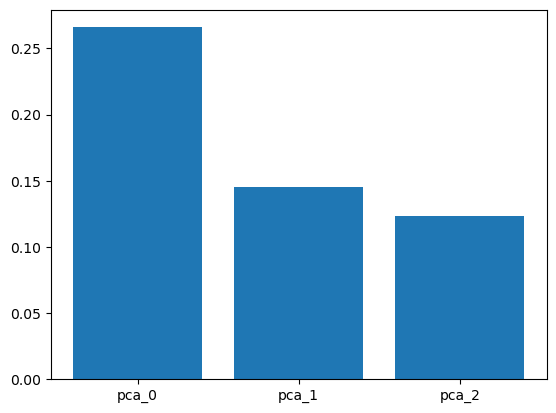

In [19]:
plt.bar(pca_names, pca.explained_variance_ratio_)

In [20]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

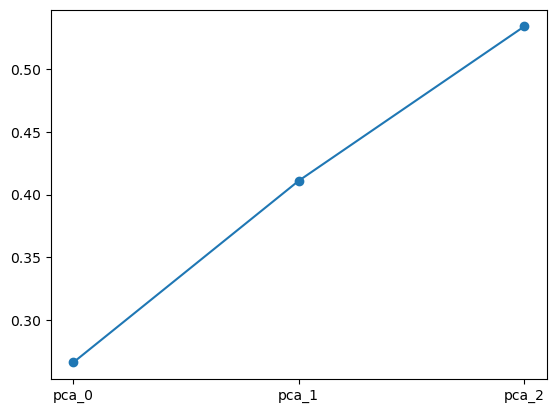

In [21]:
plt.plot(pca_names, cumulative_variance_ratio, marker = 'o')

In [22]:
def plot_3d_scatter(x, y, z, classes, xlabel, ylabel, zlabel, title):
    data = {'x': x, 'y': y, 'z': z, 'class': classes}
    
    fig = px.scatter_3d(data, x='x', y='y', z='z', color='class', title=title)
    
    if xlabel:
        fig.update_layout(scene=dict(xaxis_title=xlabel))
    if ylabel:
        fig.update_layout(scene=dict(yaxis_title=ylabel))
    if zlabel:
        fig.update_layout(scene=dict(zaxis_title=zlabel))
    
    fig.show()
    
plot_3d_scatter(X_pca['pca_0'], X_pca['pca_1'], X_pca['pca_2'],y, 'X Label', 'Y Label', 'Z Label', '3D Scatterplot')


In [23]:
X_pca.describe()

pca_0         pca_1         pca_2
count  1.747000e+03  1.747000e+03  1.747000e+03
mean  -1.626887e-17  2.033608e-18  1.626887e-17
std    1.631268e+00  1.204967e+00  1.110366e+00
min   -3.449017e+00 -3.210232e+00 -2.442063e+00
25%   -1.374977e+00 -8.798177e-01 -7.911078e-01
50%   -2.416308e-04 -1.615693e-01 -1.419710e-01
75%    1.303133e+00  8.237778e-01  6.344990e-01
max    5.142061e+00  3.918866e+00  4.315481e+00

In [24]:
kmeans = KMeans(n_clusters = 10, n_init = 10)

In [25]:
kmeans.fit(X_pca)

KMeans(n_clusters=10, n_init=10)

In [26]:
kmeans.cluster_centers_

array([[-1.89425429, -0.99411055,  1.07878685],
       [ 0.15884383, -0.82214684,  0.0069765 ],
       [ 0.04865395,  0.37845907, -0.89912719],
       [-0.03859551,  1.83172778,  1.20285426],
       [ 1.66961143, -0.21466617, -1.03216325],
       [-1.64648388,  1.37175049,  0.12806571],
       [ 2.0353428 ,  1.40680159,  0.5067947 ],
       [-1.92841996, -0.41323416, -0.74412094],
       [ 2.30854896, -1.16136075,  0.34327195],
       [ 0.53639461, -1.65396165,  2.41117304]])

In [27]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=pca_names)
centers

pca_0     pca_1     pca_2
0 -1.894254 -0.994111  1.078787
1  0.158844 -0.822147  0.006977
2  0.048654  0.378459 -0.899127
3 -0.038596  1.831728  1.202854
4  1.669611 -0.214666 -1.032163
5 -1.646484  1.371750  0.128066
6  2.035343  1.406802  0.506795
7 -1.928420 -0.413234 -0.744121
8  2.308549 -1.161361  0.343272
9  0.536395 -1.653962  2.411173

In [28]:
kmeans.inertia_

2148.14226411935

In [29]:

# Assuming you have X_pca DataFrame and kmeans.labels_ available

def plot_interactive_3d_scatter(X_pca, labels, centers, title=None):
    X_pca['Cluster'] = labels
    centers['Cluster'] = 'Centroid'
    
    # Combine data points and centroids into one DataFrame
    combined_data = pd.concat([X_pca, centers], ignore_index=True)
    
    fig = px.scatter_3d(
        combined_data, x='pca_0', y='pca_1', z='pca_2', color='Cluster',
        title=title,
        color_discrete_map={'Centroid': 'black'}  # Color the 'Centroid' label in black
    )
    
    fig.update_traces(marker=dict(size=[10 if cluster == 'Centroid' else 5 for cluster in combined_data['Cluster']]))
    
    fig.show()

# Example usage:
# Assuming you have X_pca DataFrame and kmeans.labels_ available
plot_interactive_3d_scatter(X_pca, kmeans.labels_, centers, title='Interactive 3D Scatterplot')


In [30]:
silhouette_values = silhouette_samples(X_pca, kmeans.labels_)
silhouette_values
#silueta treba biti pozitivna i sto blize nuli

array([0.46044341, 0.45676438, 0.26398229, ..., 0.45360436, 0.47882661,
       0.59022656])

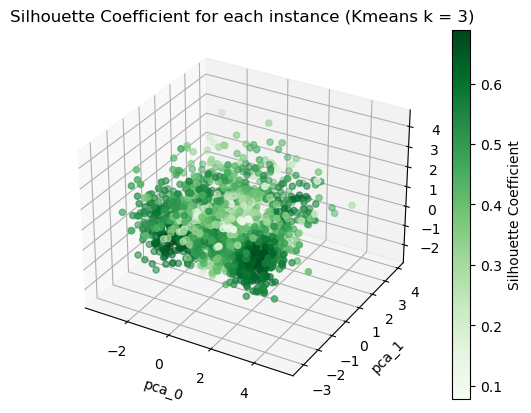

In [31]:

# Compute silhouette coefficients for each data point
silhouette_values = silhouette_samples(X_pca, kmeans.labels_)

# Create a 3D scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on silhouette values
scatter = ax.scatter(X_pca['pca_0'], X_pca['pca_1'], X_pca['pca_2'], c=silhouette_values, cmap="Greens")

# Add colorbar
plt.colorbar(scatter, label="Silhouette Coefficient")

# Set axis labels and title
ax.set_xlabel('pca_0')
ax.set_ylabel('pca_1')
ax.set_zlabel('pca_2')
plt.title("Silhouette Coefficient for each instance (Kmeans k = 3)")

plt.show()


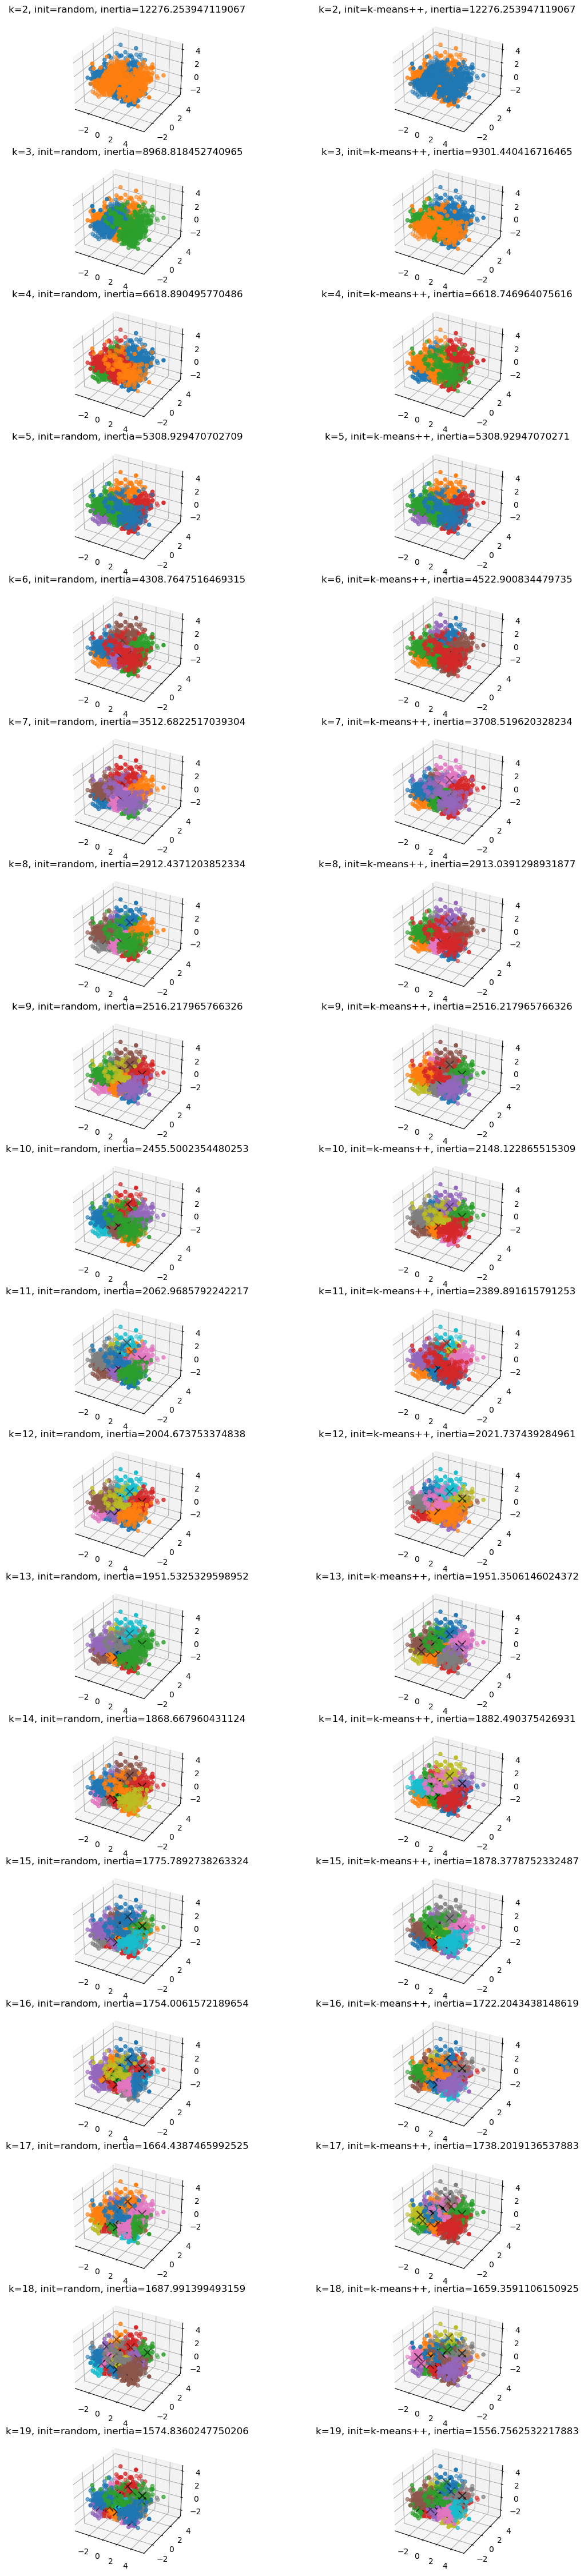

In [32]:

ks = range(2, 20)
inits = ['random', 'k-means++']

fig = plt.figure(figsize=(15, 45))
idx = 1
silhouette = []
inertias = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init='auto')
        kmeans.fit(X_pca)  
        
        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
            silhouette.append(silhouette_score(X_pca, kmeans.labels_))

        ax = fig.add_subplot(len(ks), len(inits), idx, projection='3d')  # Use 3D projection

        for label in range(k):
            cluster = X_pca[kmeans.labels_ == label]
            ax.scatter(cluster['pca_0'], cluster['pca_1'], cluster['pca_2'])
        
        centroids = kmeans.cluster_centers_
        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='black', marker='x', s=100)
            
        ax.set_title(f'k={k}, init={init}, inertia={kmeans.inertia_}')
        idx += 1

plt.tight_layout()
plt.show()


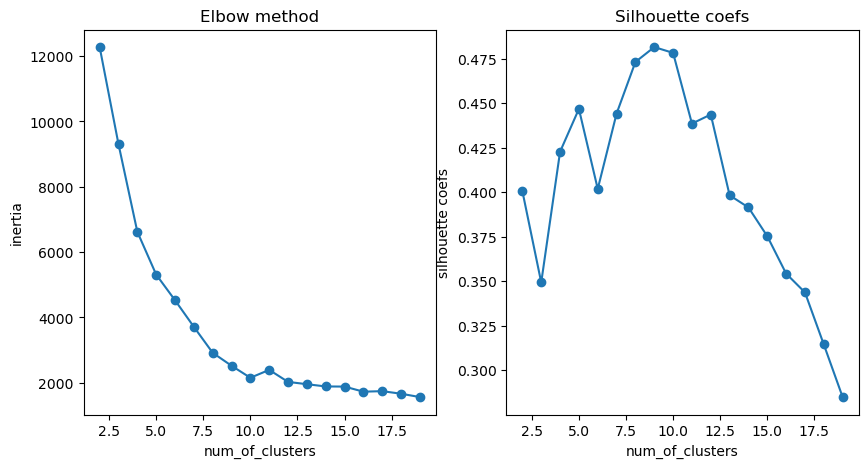

In [33]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker="o")
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

plt.show()

In [34]:
bkmeans = BisectingKMeans(n_clusters=3,bisecting_strategy='largest_cluster')
bkmeans

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

In [35]:
bkmeans.fit(X_pca)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

In [36]:
def visualize_clustering_3d(data, centers, labels, feature_names, alg_name):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot cluster centroids
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='X', s=100, c='black', label='Centroids')

    # Plot data points for each cluster
    for c in np.unique(labels):
        elems = X_pca[labels == c]
        ax.scatter(elems[feature_names[0]], elems[feature_names[1]], elems[feature_names[2]], label=f'Cluster {c}')

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    ax.set_title(f'{alg_name} Clustering ({len(centers)} clusters)')
    ax.legend()

    plt.show()

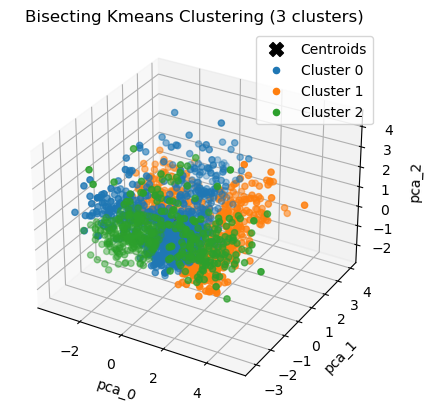

In [37]:
visualize_clustering_3d(X_pca, bkmeans.cluster_centers_, bkmeans.labels_, ['pca_0', 'pca_1', 'pca_2'], "Bisecting Kmeans")